# Overview of the dataset

The analysis is based on unemployment rate data for the years 2019–2020, sourced from CodeAlpha. This dataset provides valuable insights into employment trends across different regions during this period.

The dataset includes the following key variables:

* **Region**: Represents different states and regions included in the study.

* **Date**: Indicates the specific date on which the unemployment data was recorded.

* **Unemployment Rate (%)**: Shows the percentage of the labor force that is unemployed at a given time.

* **Employed**: Represents the total number of people who are employed.

* **Labour Participation Rate (LPR)**: Indicates the proportion of the working-age population actively participating in the labor force, expressed in decimal form.

* **Area**: Specifies whether the data corresponds to rural or urban regions.



# Objectives of the data 

 1.**Analyze unemployment trends** to understand the number of unemployed and employed individuals during 2019 and the Covid-19 pandemic period.

 2.**Identify** area-wise unemployment patterns, particularly comparing rural and urban regions, and compute the average unemployment rate (e.g., an average of 10.32% unemployment in rural areas).

 3.**Explore and quantify the impact of Covid-19 on unemployment rates** to measure how significantly employment levels were affected during the pandemic.

 4.**Examine** region-wise impact to identify the states or regions that were most affected during the pandemic.

 5.**Compare pre-Covid and Covid periods** to analyze changes in employment trends and highlight key differences in unemployment rates.

 6.**Identify key patterns and seasonal trends** in unemployment data over time.

 7.**Present data-driven insights** that can help inform economic planning, labor market strategies, and social welfare policies.

In [11]:
#Import all the necessery libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
import random 
from warnings import filterwarnings
filterwarnings ('ignore')
plt.rcParams['figure.figsize']=(12,6)

In [12]:
#Read and upload csv file
df =pd.read_csv("D:\\Unemployment in India.csv")

In [13]:
#Check first columns
df.head()

Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural

In [14]:
#Check last columns
df.tail()

Region  Date  Frequency   Estimated Unemployment Rate (%)  \
763    NaN   NaN        NaN                               NaN   
764    NaN   NaN        NaN                               NaN   
765    NaN   NaN        NaN                               NaN   
766    NaN   NaN        NaN                               NaN   
767    NaN   NaN        NaN                               NaN   

      Estimated Employed   Estimated Labour Participation Rate (%) Area  
763                  NaN                                       NaN  NaN  
764                  NaN                                       NaN  NaN  
765                  NaN                                       NaN  NaN  
766                  NaN                                       NaN  NaN  
767                  NaN                                       NaN  NaN

In [15]:
#Check null values
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [16]:
#Dataset information
df.info()
#insights: data type is incorrect

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [17]:
#Check basic information in given data
df.describe()

Estimated Unemployment Rate (%)  Estimated Employed  \
count                       740.000000        7.400000e+02   
mean                         11.787946        7.204460e+06   
std                          10.721298        8.087988e+06   
min                           0.000000        4.942000e+04   
25%                           4.657500        1.190404e+06   
50%                           8.350000        4.744178e+06   
75%                          15.887500        1.127549e+07   
max                          76.740000        4.577751e+07   

       Estimated Labour Participation Rate (%)  
count                               740.000000  
mean                                 42.630122  
std                                   8.111094  
min                                  13.330000  
25%                                  38.062500  
50%                                  41.160000  
75%                                  45.505000  
max                                  72.570000

In [18]:
#To display information in a given complete data
display(df.describe(include='all'))

Region         Date  Frequency  \
count              740          740        740   
unique              28           14          2   
top     Andhra Pradesh   31-10-2019    Monthly   
freq                28           55        381   
mean               NaN          NaN        NaN   
std                NaN          NaN        NaN   
min                NaN          NaN        NaN   
25%                NaN          NaN        NaN   
50%                NaN          NaN        NaN   
75%                NaN          NaN        NaN   
max                NaN          NaN        NaN   

         Estimated Unemployment Rate (%)   Estimated Employed  \
count                         740.000000         7.400000e+02   
unique                               NaN                  NaN   
top                                  NaN                  NaN   
freq                                 NaN                  NaN   
mean                           11.787946         7.204460e+06   
std                            10.721298         8.087988e+06   
min                             0.000000         4.942000e+04   
25%                             4.657500         1.190404e+06   
50%                             8.350000         4.744178e+06   
75%                            15.887500         1.127549e+07   
max                            76.740000         4.577751e+07   

         Estimated Labour Participation Rate (%)   Area  
count                                 740.000000    740  
unique                                       NaN      2  
top                                          NaN  Urban  
freq                                         NaN    381  
mean                                   42.630122    NaN  
std                                     8.111094    NaN  
min                                    13.330000    NaN  
25%                                    38.062500    NaN  
50%                                    41.160000    NaN  
75%                                    45.505000    NaN  
max                                    72.570000    NaN

# Treat missing values we should remove 

In [19]:
df = df.dropna().reset_index(drop=True)

In [20]:
#so now the missing values is dropped but we we still check
df.isnull().sum()
#look it was easy

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [21]:
#Clean columns names
df.columns = df.columns.str.strip()

In [22]:
##Change datatype of date since its object
df['Date']= pd.to_datetime(df['Date'],errors = 'coerce')
# this force the columns to float

In [23]:
#Conveted
df['Date']

0     2019-05-31
1     2019-06-30
2     2019-07-31
3     2019-08-31
4     2019-09-30
         ...    
735   2020-02-29
736   2020-03-31
737   2020-04-30
738   2020-05-31
739   2020-06-30
Name: Date, Length: 740, dtype: datetime64[ns]

In [24]:
# Delete unwanted column
df.drop('Frequency',axis=1,inplace = True)

In [25]:
#Deleting unwanted column to check after the file
df.head()

Region       Date  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh 2019-05-31                             3.65   
1  Andhra Pradesh 2019-06-30                             3.05   
2  Andhra Pradesh 2019-07-31                             3.75   
3  Andhra Pradesh 2019-08-31                             3.32   
4  Andhra Pradesh 2019-09-30                             5.17   

   Estimated Employed  Estimated Labour Participation Rate (%)   Area  
0          11999139.0                                    43.24  Rural  
1          11755881.0                                    42.05  Rural  
2          12086707.0                                    43.50  Rural  
3          12285693.0                                    43.97  Rural  
4          12256762.0                                    44.68  Rural

In [26]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 6 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Estimated Unemployment Rate (%)          740 non-null    float64       
 3   Estimated Employed                       740 non-null    float64       
 4   Estimated Labour Participation Rate (%)  740 non-null    float64       
 5   Area                                     740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 34.8+ KB


In [27]:
#Make the column name simple
df.rename(columns={
    "Estimated Unemployment Rate (%)":"UnEmployment(%)",
    "Estimated Employed":"Employed",
    "Estimated Labour Participation Rate (%)":"LabourParticipationRate"
},inplace=True)


In [28]:
df.head()
#Look now its clean and look good

Region       Date  UnEmployment(%)    Employed  \
0  Andhra Pradesh 2019-05-31             3.65  11999139.0   
1  Andhra Pradesh 2019-06-30             3.05  11755881.0   
2  Andhra Pradesh 2019-07-31             3.75  12086707.0   
3  Andhra Pradesh 2019-08-31             3.32  12285693.0   
4  Andhra Pradesh 2019-09-30             5.17  12256762.0   

   LabourParticipationRate   Area  
0                    43.24  Rural  
1                    42.05  Rural  
2                    43.50  Rural  
3                    43.97  Rural  
4                    44.68  Rural

In [29]:
#Check duplicates
df.duplicated().sum()
# So not duplicates

np.int64(0)

In [30]:
df['Area'].value_counts()
#just checks how many urban and rural labours they and just same

Area
Urban    381
Rural    359
Name: count, dtype: int64

In [31]:
df.groupby('Area')['Employed'].sum()
# Look Look the Rural has 365 million employed people
# urban has 167 million

Area
Rural    3.659234e+09
Urban    1.672066e+09
Name: Employed, dtype: float64

In [32]:
#average unemployement rate means 10.32 % people in unemployed in Rural area 
df.groupby('Area')['UnEmployment(%)'].mean()

Area
Rural    10.324791
Urban    13.166614
Name: UnEmployment(%), dtype: float64

In [33]:
df.head()

Region       Date  UnEmployment(%)    Employed  \
0  Andhra Pradesh 2019-05-31             3.65  11999139.0   
1  Andhra Pradesh 2019-06-30             3.05  11755881.0   
2  Andhra Pradesh 2019-07-31             3.75  12086707.0   
3  Andhra Pradesh 2019-08-31             3.32  12285693.0   
4  Andhra Pradesh 2019-09-30             5.17  12256762.0   

   LabourParticipationRate   Area  
0                    43.24  Rural  
1                    42.05  Rural  
2                    43.50  Rural  
3                    43.97  Rural  
4                    44.68  Rural

In [34]:
#Check unique values in the row under the region
df['Region'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Chandigarh'],
      dtype=object)

In [35]:
df['Region'].value_counts

<bound method IndexOpsMixin.value_counts of 0      Andhra Pradesh
1      Andhra Pradesh
2      Andhra Pradesh
3      Andhra Pradesh
4      Andhra Pradesh
            ...      
735       West Bengal
736       West Bengal
737       West Bengal
738       West Bengal
739       West Bengal
Name: Region, Length: 740, dtype: object>

# Data Cleaned

# Explratory Data Analysis(EDA)- Visualization and Trends Discovery

In [36]:
#styling
sns.set(style='whitegrid')

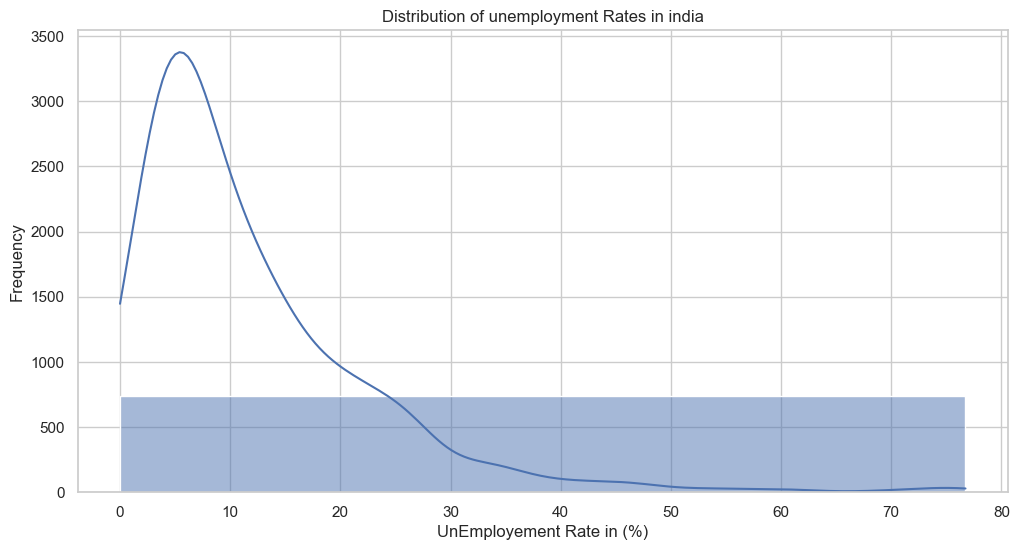

In [37]:
#Un employment rate distribution
plt.figure()
sns.histplot(df['UnEmployment(%)'],bins=True,kde=True)
plt.title("Distribution of unemployment Rates in india")
plt.xlabel("UnEmployement Rate in (%)")
plt.ylabel("Frequency")
plt.show()

# heavily right-skewed

# Insights: of Distribution Rate Unemployment Rates 

1. **Right-Skewed Distribution**

    * The graph is positively skewed, meaning most unemployment values are concentrated at the lower end, with a long tail toward higher unemployment rates.

    * This suggests that extreme unemployment levels were rare, but when they occurred, they were very high.

2. **Majority of Observations at Low to Moderate Rates**

    * Most data points fall roughly between **5% and 15% unemployment.**

    * This indicates that under normal conditions (pre-COVID), unemployment in India generally stayed within this range.

3. **Sharp Peak at Lower Unemployment Levels**

    * The highest frequency occurs around **6–8%,** showing this was the most common unemployment rate across regions/time periods.

4. **Presence of Extreme Outliers**

    * Values extending beyond **30% up to ~75%** indicate **severe spikes in unemployment.**

    * These extreme values are likely associated with the **COVID-19 lockdown period,** when economic activity was heavily disrupted.

5. **COVID-19 Impact Clearly Visible**

    * The long right tail strongly suggests that **COVID-19 caused sudden and unprecedented increases in unemployment,** especially in certain regions or months.

6. **High Variability During Crisis Period**

    * The wide spread of the distribution reflects **significant variation across regions and time,** highlighting unequal economic impact.

# Conclusion of the Insight
The distribution shows that while unemployment in India typically remained moderate, the COVID-19 pandemic led to rare but extreme spikes, causing a highly skewed unemployment pattern. This highlights the need for targeted employment and social support policies during economic crises.

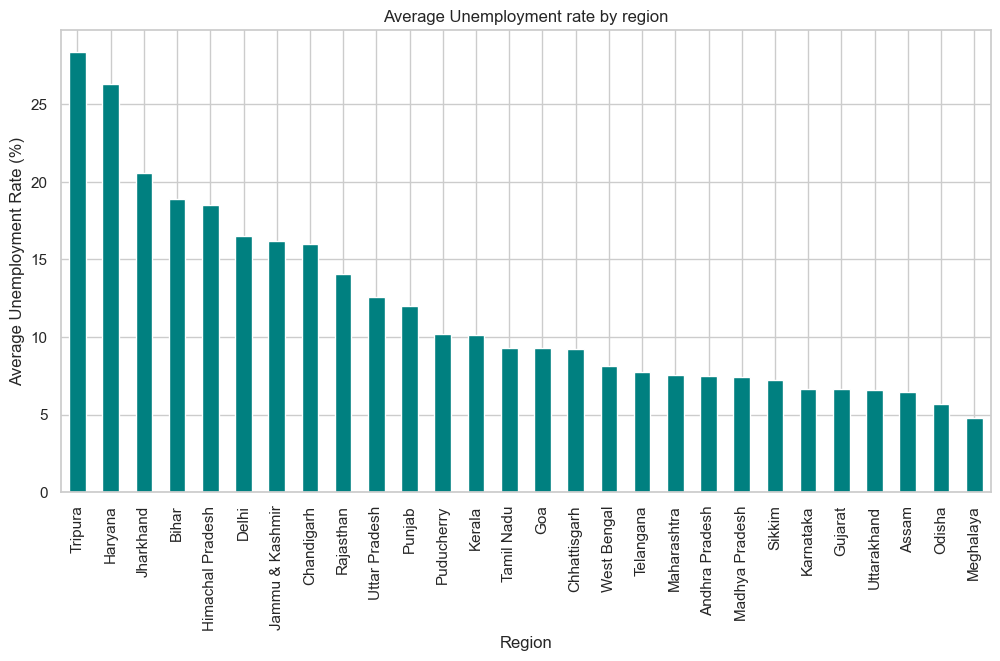

In [38]:
# look now most unemployed people are in Tripura
region_unemp =df.groupby('Region')['UnEmployment(%)'].mean().sort_values(ascending=False)

plt.figure()
region_unemp.plot(kind='bar',color='teal')
plt.title("Average Unemployment rate by region")
plt.xlabel('Region')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.show()


# Insights: Average Unemployment rate by region

1. **Highest Unemployment Regions** 

    * **Tripura** shows the **highest average unemployment rate (~28%),** making it the most affected region.

    * **Haryana** follows closely (~26%), indicating persistent job-market stress.

    * **Jharkhand, Bihar, and Himachal Pradesh** also record **high unemployment (18–21%),** reflecting structural employment challenges.

2. **Moderate Unemployment Regions** 

    * States like **Delhi, Jammu & Kashmir, Chandigarh, Rajasthan, Uttar Pradesh, and Punjab** fall in the **12–16% range.**

    * These regions show **moderate but consistent unemployment,** likely influenced by urban migration and sectoral slowdowns.

3. **Lower Unemployment Regions** 

    * **Kerala, Tamil Nadu, Goa, and Chhattisgarh** maintain unemployment around **9–10%,** suggesting relatively stable labor markets.

    * **West Bengal, Telangana, Maharashtra, Andhra Pradesh, and Madhya Pradesh** show **controlled unemployment levels (7–8%).**

4. **Best Performing Regions (Lowest Unemployment)** 

    * **Meghalaya** (~5%) records the **lowest average unemployment rate.**

    * **Odisha, Assam, Uttarakhand, Gujarat, Karnataka, and Sikkim** also perform well with unemployment below **7%.**

5. **Large Regional Disparities** 

    * The gap between the **highest (Tripura ~28%)** and **lowest (Meghalaya ~5%)** is **over 20 percentage points.**

    * This highlights **significant regional inequality** in employment opportunities across India.

6. **Policy Implication** 

    * High-unemployment regions need **targeted job-creation programs, skill development, and industrial investment.**

    * Low-unemployment regions can serve as **benchmark models** for employment policies and economic planning.

# Conslusion of the Insight
The graph reveals strong regional variation in unemployment rates across India, with northeastern and some northern states facing higher unemployment, while several southern and eastern states show relatively stable employment conditions.

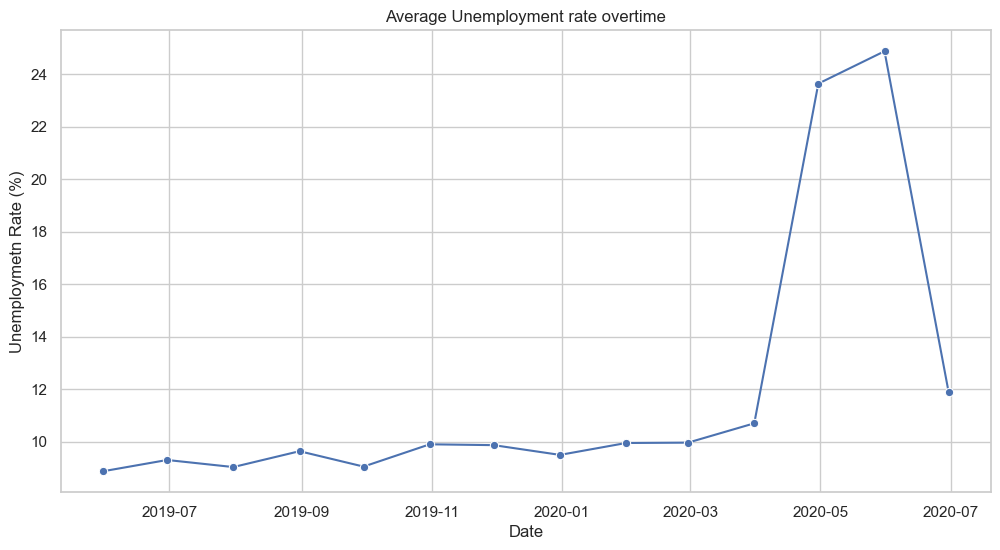

In [39]:
# Time based Trend
trend = df.groupby('Date')['UnEmployment(%)'].mean().reset_index()
#lets make the figure

plt.figure()
sns.lineplot(data = trend ,x = 'Date',y = 'UnEmployment(%)',marker='o')
plt.title("Average Unemployment rate overtime")
plt.xlabel('Date')
plt.ylabel("Unemploymetn Rate (%)")
plt.show()

## the highest peak is highest unemployment period
## and lowest valleys is the time with lowest unemployment

# Insights: Average Umemployment Rate Over Time 

 1. **Stable Pre-COVID Period (Mid-2019 to Early-2020)**

    * From **June 2019 to March 2020,** unemployment remains **largely stable between ~9% and 10%.**

    * Minor month-to-month fluctuations indicate **a relatively balanced labor market** before the pandemic.

 
        
 2. **Sudden Spike During COVID-19 Lockdown**

    * A **sharp surge** occurs in **April–May 2020,** with unemployment jumping from ~10% to **over 23–25%.**

    * This reflects the **nationwide lockdown,** closure of industries, and large-scale job losses, especially in informal sectors.

 
 3. **Peak Unemployment**

    * The **highest unemployment rate (~25%)** is observed around **May–June 2020,** marking the **worst employment crisis in the dataset.**

 
 
 4. **Early Signs of Recovery**

    * By **July 2020,** unemployment drops to around **12%,** showing **partial recovery** as lockdown restrictions eased and economic activities resumed.

 
 
 5. **High Volatility During Crisis**

    * Compared to the steady pre-COVID period, the pandemic phase shows **extreme volatility,** highlighting the economy’s vulnerability to external shocks.

# Conclusion of the Insight
The time-series trend clearly demonstrates that COVID-19 had a dramatic and immediate impact on employment in India, disrupting an otherwise stable labor market and causing unprecedented unemployment levels, followed by a gradual recovery phase.


## Hence From the above chart clearly can see the covid pandemic how much unemploymet rises in 2020

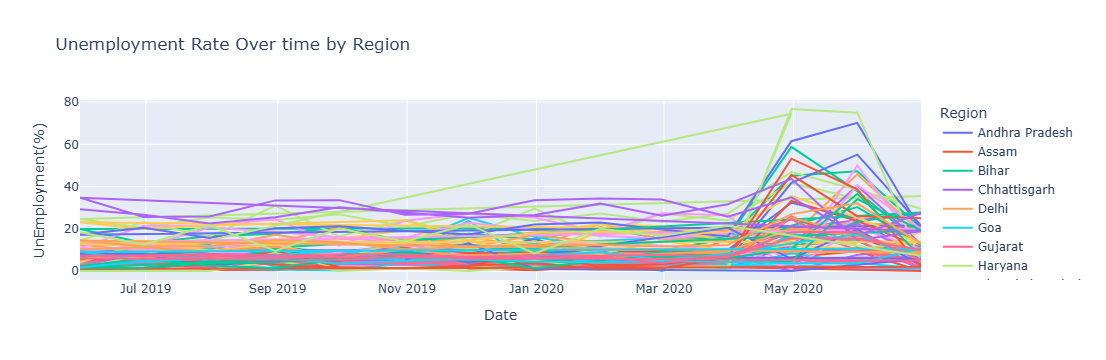

In [40]:
#Now zoom where you want
fig = px.line(df,x='Date',y='UnEmployment(%)',color='Region',
              title='Unemployment Rate Over time by Region')

fig.show()

# Insights: Unemployment rate overtime by the region

1. **Stable Trends Before COVID-19**

    * From **mid-2019 to March 2020,** most regions show **relatively stable unemployment,** generally staying **below 20%.**

    * Minor fluctuations indicate **normal seasonal or regional variations** in employment.

2. **Sharp Spike During COVID-19 Lockdown**

    * A **dramatic rise** in unemployment is visible around **April–May 2020** across **almost all regions.**

    * Several states experience unemployment rates **above 40%,** with some peaking near **70–75%,** highlighting the severity of the lockdown impact.

3. **Uneven Regional Impact**

    * The magnitude of the spike varies widely:

    * Some regions (e.g.,**Haryana, Bihar, Chhattisgarh, Andhra Pradesh**) show **extreme surges.**

    * Others experience moderate increases, suggesting differences in economic structure and labor dependency.

4. **Post-Lockdown Partial Recovery**

    * By **June–July 2020,** unemployment rates **decline sharply** in most regions.

    * This indicates **a gradual reopening of economic activities** and partial job recovery.

5. **High Volatility During Crisis Period**

    * Compared to the smooth pre-COVID period, the pandemic phase shows **high volatility and divergence** among states.

    * Informal and daily-wage labor-dependent regions were **most vulnerable.**

6. **Policy Insight**

    * The graph highlights the need for **region-specific employment policies,** especially during economic shocks.

    * States with extreme spikes require **stronger social security and job protection mechanisms.**

# Conclusion of the Insight
The region-wise unemployment trend clearly shows that COVID-19 caused a synchronized but uneven employment shock across India, with significant inter-state disparities and a gradual recovery phase post-lockdown.

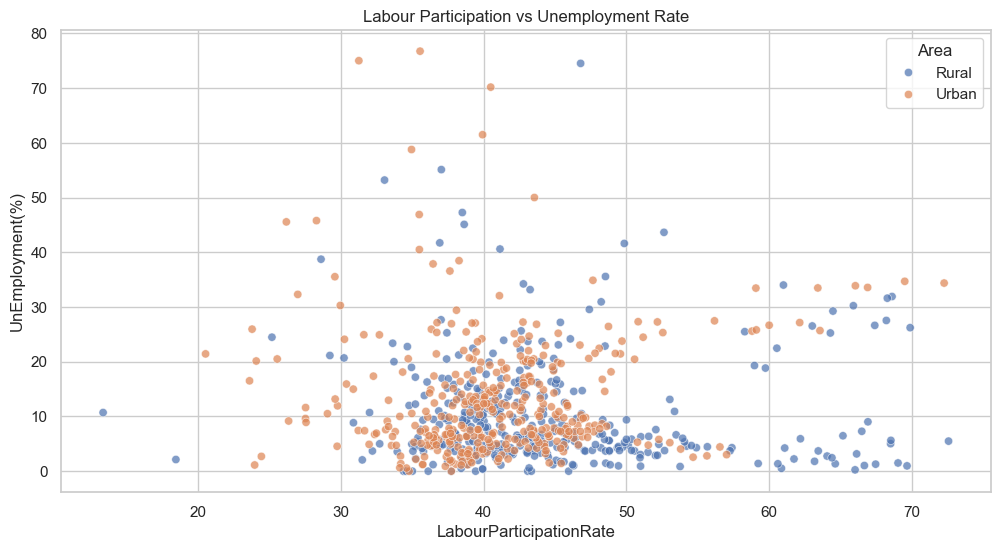

In [41]:
#Display visualization
plt.figure()
sns.scatterplot(
    data=df,
    x='LabourParticipationRate',
    y='UnEmployment(%)',
    hue='Area',
    alpha=0.7
)
plt.title('Labour Participation vs Unemployment Rate')

plt.show()


# Insights: Labour Participation Rate VS Unemployment Rate(Rural VS Urban)

1. **Weak Overall Correlation**

    * The scatter shows **no strong linear relationship** between labour participation rate (LPR) and unemployment rate.

    * High or low participation does **not automatically imply** high or low unemployment.

2. **Rural Areas Show Higher Participation**

    * Rural points are more concentrated at **higher LPR values (45–70%).**

    * Despite higher participation, **unemployment remains relatively low (mostly below 10%)** in rural areas.

3. **Urban Areas Have Lower Participation with Higher Unemployment**

    * Urban data clusters around **30–45% LPR.**

    * Urban regions show **greater variability and higher unemployment,** often ranging from **10% to 30%,** with some extreme values.

4. **Extreme Unemployment More Common in Urban Areas**

    * Very high unemployment rates (**above 50–70%**) mostly appear in **urban observations.**

    * This suggests urban jobs were **more affected during economic shocks,** especially during COVID-19.

5. **Rural Employment Appears More Resilient**

    * Rural regions tend to absorb labor through **agriculture and informal work,** helping keep unemployment lower even with high participation.

6. **Urban Labour Markets Are More Volatile**

    * Urban employment is more dependent on **industry, services, and mobility,** making it more vulnerable to lockdowns and economic slowdowns.

# Conclusion of the Insight
The graph highlights structural differences between rural and urban labor markets in India: rural areas maintain higher workforce participation with relatively lower unemployment, while urban areas experience greater unemployment volatility despite lower participation rates.

In [42]:
df.head()

Region       Date  UnEmployment(%)    Employed  \
0  Andhra Pradesh 2019-05-31             3.65  11999139.0   
1  Andhra Pradesh 2019-06-30             3.05  11755881.0   
2  Andhra Pradesh 2019-07-31             3.75  12086707.0   
3  Andhra Pradesh 2019-08-31             3.32  12285693.0   
4  Andhra Pradesh 2019-09-30             5.17  12256762.0   

   LabourParticipationRate   Area  
0                    43.24  Rural  
1                    42.05  Rural  
2                    43.50  Rural  
3                    43.97  Rural  
4                    44.68  Rural

# COVID-19 Impact Analysis

In [43]:
covid_start = pd.Timestamp("2020-03-01")

In [44]:
print(type(covid_start))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [45]:
#Comparing before and during
pre_covid = df[df['Date'] < covid_start]
during_covid = df[df['Date'] >= covid_start]

print("Pre-Covid Samples:",len(pre_covid))
print("During Covid Samples",len(during_covid))

Pre-Covid Samples: 536
During Covid Samples 204


In [46]:
#Campare Mean Unemployment Name
pre_mean = pre_covid['UnEmployment(%)'].mean()
during_mean = during_covid['UnEmployment(%)'].mean()

print(f"Average Unemployment Rate Before COVID: {pre_mean:.2f}%")
print(f"Average Unemployment Rate during COVID:{during_mean:.2f}%")

Average Unemployment Rate Before COVID: 9.51%
Average Unemployment Rate during COVID:17.77%


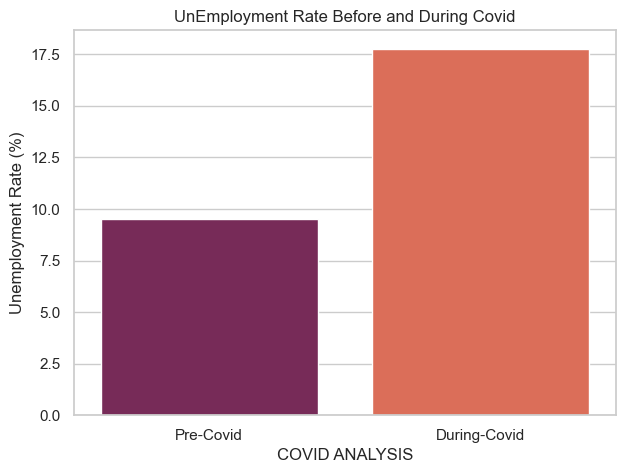

In [47]:
#Graphical Analysis Pre-Covid,During Covid
fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(x=['Pre-Covid','During-Covid'],y=[pre_mean,during_mean],palette='rocket')
plt.title("UnEmployment Rate Before and During Covid")
plt.xlabel("COVID ANALYSIS")
plt.ylabel("Unemployment Rate (%)")
plt.show()

# Insights: Unemployment Rate Before vs during covid-19

1. **Sharp Increase in Unemployment During COVID-19**

    * The unemployment rate increased from **~9.5% (Pre-COVID) to ~17.8% (During COVID).**

    * This represents **nearly a twofold rise,** showing the severe economic impact of the pandemic.

2. **COVID-19 as a Major Employment Shock**

    * The sudden jump clearly indicates that **COVID-19 disrupted labor markets across India.**

    * Lockdowns, business closures, and reduced economic activity directly contributed to job losses.

3. **Pre-COVID Labour Market Was Relatively Stable**

    * Before the pandemic, unemployment remained **below 10%,** suggesting **a comparatively stable employment scenario.**

4. **Magnitude of Impact**

    * The increase of **~8–9 percentage points** highlights the **scale of the crisis,** especially for daily-wage workers and informal sector employees.

5. **Supports Time-Series and Regional Evidence**

    * This bar chart **confirms patterns seen in earlier graphs,** such as the unemployment spike during April–May 2020.

# Conclusion of the insight

The comparison clearly demonstrates that COVID-19 caused a dramatic rise in unemployment in India, nearly doubling the rate and exposing the vulnerability of the workforce to sudden economic shocks.

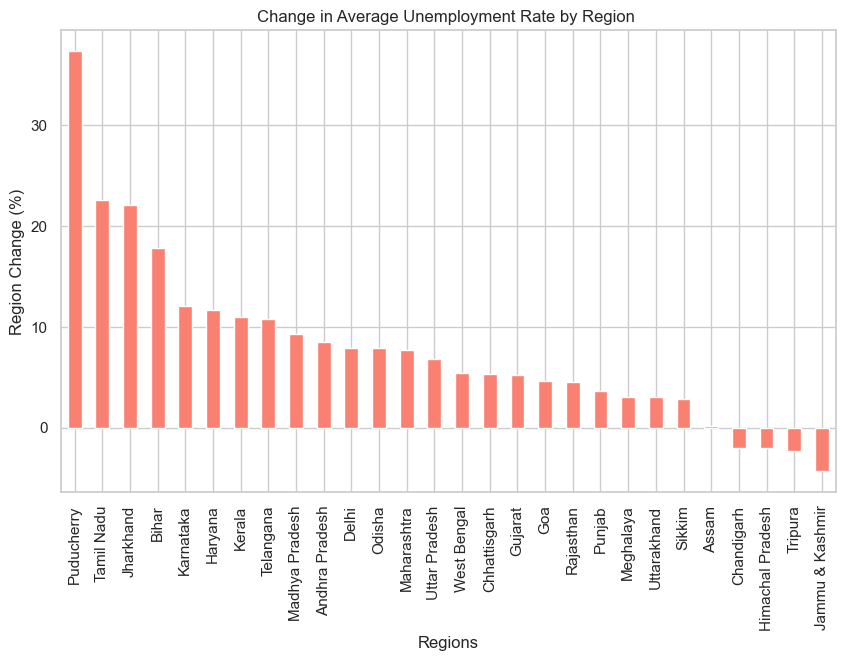

In [48]:
# lets see region was most affected by Covid
region_change = (
    during_covid.groupby('Region')['UnEmployment(%)'].mean()
    -pre_covid.groupby('Region')['UnEmployment(%)'].mean()
).sort_values(ascending=False).dropna()

plt.figure(figsize=(10,6))
region_change.plot(kind='bar',color='salmon')
plt.title('Change in Average Unemployment Rate by Region ')
plt.xlabel("Regions")
plt.ylabel("Region Change (%)")
plt.xticks(rotation=90)
plt.show()

# Insights: Change in Average Unemployement Rate by Region

 1. **Regions with the Highest Increase in Unemployment**

    * Puducherry shows the largest rise (~37%), indicating it was the most severely impacted region.

    * Tamil Nadu and Jharkhand also experienced very high increases (20%+), reflecting strong disruption 
      in industrial and migrant-labor-dependent economies.

    * Bihar and Karnataka follow with significant increases (~12–18%).

 2. **Moderate Impact Regions**

    * States like Haryana, Kerala, Telangana, Madhya Pradesh, Andhra Pradesh, Delhi, Odisha, and 
      Maharashtra show moderate increases (7–11%).

    * These regions were affected but showed **better resilience** compared to the worst-hit states.

 3. **Low Impact / Stable Regions**

    * West Bengal, Chhattisgarh, Gujarat, Goa, Rajasthan, and Punjab recorded smaller increases (3–6%), 
      indicating relatively stable employment conditions.

 4. **Regions with Minimal or Negative Change**

    * Sikkim shows almost no change, suggesting strong employment stability.

    * Assam, Chandigarh, Himachal Pradesh, Tripura, and Jammu & Kashmir show negative change, meaning 
      unemployment did not increase or slightly  decreased during the comparison period.

 5. **Strong Regional Disparities**

    * The variation ranges from +37% to −5%, highlighting **uneven regional impact** of the pandemic.

    * Economic structure, industrial dependence, and labor migration patterns likely explain these differences.

# Conclusion of the Insight
The graph reveals that COVID-19’s impact on unemployment was highly uneven across Indian regions, with some states experiencing extreme job losses while others remained relatively stable or even improved.

In [49]:
#Overall analysis of the data
df.head()

Region       Date  UnEmployment(%)    Employed  \
0  Andhra Pradesh 2019-05-31             3.65  11999139.0   
1  Andhra Pradesh 2019-06-30             3.05  11755881.0   
2  Andhra Pradesh 2019-07-31             3.75  12086707.0   
3  Andhra Pradesh 2019-08-31             3.32  12285693.0   
4  Andhra Pradesh 2019-09-30             5.17  12256762.0   

   LabourParticipationRate   Area  
0                    43.24  Rural  
1                    42.05  Rural  
2                    43.50  Rural  
3                    43.97  Rural  
4                    44.68  Rural

In [50]:
#Data All done but lets save clean csv file
df.to_csv("Cleaned_Data.csv",index=False)

In [51]:
#Confirmed
df.isnull().sum()

Region                     0
Date                       0
UnEmployment(%)            0
Employed                   0
LabourParticipationRate    0
Area                       0
dtype: int64

In [52]:
#Finalize the project
print("Project execution complete!")

Project execution complete!
